In [4]:


# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline



-

In [9]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders

train_filename = 'notMNIST_large.tar.gz'
test_filename = 'notMNIST_small.tar.gz'
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 'notMNIST_large/D', 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 'notMNIST_large/H', 'notMNIST_large/I', 'notMNIST_large/J']
['notMNIST_small/A', 'notMNIST_small/B', 'notMNIST_small/C', 'notMNIST_small/D', 'notMNIST_small/E', 'notMNIST_small/F', 'notMNIST_small/G', 'notMNIST_small/H', 'notMNIST_small/I', 'notMNIST_small/J']



notMNIST_large already present - Skipping extraction of notMNIST_large.tar.gz.
['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 'notMNIST_large/D', 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 'notMNIST_large/H', 'notMNIST_large/I', 'notMNIST_large/J']
notMNIST_small already present - Skipping extraction of notMNIST_small.tar.gz.
['notMNIST_small/A', 'notMNIST_small/B', 'notMNIST_small/C', 'notMNIST_small/D', 'notMNIST_small/E', 'notMNIST_small/F', 'notMNIST_small/G', 'notMNIST_small/H', 'notMNIST_small/I', 'notMNIST_small/J']


['notMNIST_small/A',
 'notMNIST_small/B',
 'notMNIST_small/C',
 'notMNIST_small/D',
 'notMNIST_small/E',
 'notMNIST_small/F',
 'notMNIST_small/G',
 'notMNIST_small/H',
 'notMNIST_small/I',
 'notMNIST_small/J']

In [10]:
from IPython.display import Image
Image(os.getcwd() + '/notMNIST_small/A/MDEtMDEtMDAudHRm.png')


    

In [26]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)


Pickling notMNIST_large/A.pickle.
notMNIST_large/A
Could not read: notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : cannot identify image file 'notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png' - it's ok, skipping.
Could not read: notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : cannot identify image file 'notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png' - it's ok, skipping.
Could not read: notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : cannot identify image file 'notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png' - it's ok, skipping.
Full dataset tensor: (52909, 28, 28)
Mean: -16.3519
Standard deviation: 56.4979
notMNIST_large/B.pickle already present - Skipping pickling.
notMNIST_large/C.pickle already present - Skipping pickling.
notMNIST_large/D.pickle already present - Skipping pickling.
notMNIST_large/E.pickle already present - Skipping pickling.
notMNIST_large/F.pickle already present - Skipping pickling.
notMNIST_large/G.pickle already present - Sk

In [23]:
train_datasets

['notMNIST_large/A.pickle',
 'notMNIST_large/B.pickle',
 'notMNIST_large/C.pickle',
 'notMNIST_large/D.pickle',
 'notMNIST_large/E.pickle',
 'notMNIST_large/F.pickle',
 'notMNIST_large/G.pickle',
 'notMNIST_large/H.pickle',
 'notMNIST_large/I.pickle',
 'notMNIST_large/J.pickle']

In [38]:
image_data = (ndimage.imread('notMNIST_large/A/a29ydW5pc2hpLnR0Zg==.png').astype(float))
image_data_alter = (ndimage.imread('notMNIST_large/A/a29ydW5pc2hpLnR0Zg==.png').astype(float) - 
                    pixel_depth / 2) / pixel_depth
data = np.ndarray(shape=(1, image_size, image_size),
                         dtype=np.float32)
data[0] = image_data_alter
file = open(train_datasets[0],'rb')
train_A = pickle.load(file)
train_A.shape

(52909, 28, 28)

Before - 
[[   0.    0.    0.    0.    4.    0.   79.  247.  253.  255.  255.  255.
   255.  255.  255.  255.  255.  255.  255.  253.  247.   79.    0.    4.
     0.    0.    0.    0.]
 [   0.    0.    0.    3.    0.   50.  238.  255.  253.  255.  255.  255.
   255.  255.  255.  255.  255.  255.  255.  253.  255.  238.   50.    0.
     3.    0.    0.    0.]
 [   0.    0.    3.    0.   31.  226.  255.  253.  255.  255.  255.  255.
   255.  255.  255.  255.  255.  255.  255.  255.  253.  255.  226.   31.
     0.    3.    0.    0.]
 [   0.    2.    1.   16.  207.  255.  252.  255.  255.  255.  255.  255.
   255.  255.  255.  255.  255.  255.  255.  255.  255.  252.  255.  207.
    16.    1.    2.    0.]
 [   1.    2.    4.  185.  255.  251.  255.  255.  255.  255.  255.  255.
   255.  255.  255.  255.  255.  255.  255.  255.  255.  255.  251.  255.
   185.    4.    2.    1.]
 [   4.    0.  159.  255.  251.  255.  255.  255.  255.  255.  255.  255.
   255.  255.  255.  255.  255.  255.  25

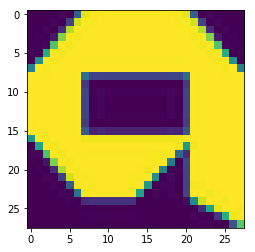

In [39]:
%matplotlib inline
print('Before - ')
print(image_data)

print('after - ')
print(data[0,:,:])

#print('28*28 -')
plt.imshow(data[0,:,:])
#print(train_A[0,:,:])
#plt.imshow(train_A[0,:,:])

In [9]:
print('Checking number of images per class...')
for letter in train_datasets:
    file = open(letter,'rb')
    dataset = pickle.load(file)
    print(letter + ' size: ' + str(dataset.shape[0]))
for letter in test_datasets:
    file = open(letter,'rb')
    dataset = pickle.load(file)
    print(letter + ' size: ' + str(dataset.shape[0]))

Checking number of images per class...
./notMNIST_large/A.pickle size: 52909
./notMNIST_large/B.pickle size: 52911
./notMNIST_large/C.pickle size: 52912
./notMNIST_large/D.pickle size: 52911
./notMNIST_large/E.pickle size: 52912
./notMNIST_large/F.pickle size: 52912
./notMNIST_large/G.pickle size: 52912
./notMNIST_large/H.pickle size: 52912
./notMNIST_large/I.pickle size: 52912
./notMNIST_large/J.pickle size: 52911
./notMNIST_small/A.pickle size: 1872
./notMNIST_small/B.pickle size: 1873
./notMNIST_small/C.pickle size: 1873
./notMNIST_small/D.pickle size: 1873
./notMNIST_small/E.pickle size: 1873
./notMNIST_small/F.pickle size: 1872
./notMNIST_small/G.pickle size: 1872
./notMNIST_small/H.pickle size: 1872
./notMNIST_small/I.pickle size: 1872
./notMNIST_small/J.pickle size: 1872


In [10]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [11]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

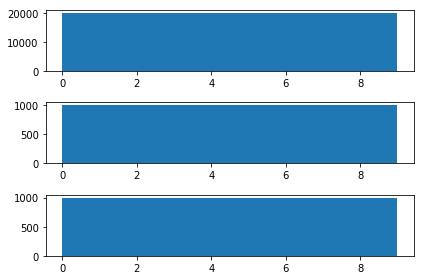

In [12]:
fig, ax = plt.subplots(3,1)
ax[0].hist(train_labels,10)
ax[1].hist(test_labels,10)
ax[2].hist(valid_labels,10)
fig.tight_layout()


In [13]:


pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise



In [14]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800503


In [43]:
train_hash = [hash(e.tobytes()) for e in train_dataset]
valid_hash = [hash(e.tobytes()) for e in valid_dataset]
test_hash = [hash(e.tobytes()) for e in test_dataset]

unique_train = set(train_hash)
unique_valid = unique_train.intersection(set(valid_hash))
unique_test = unique_train.intersection(set(test_hash))
print('Unique Train Dataset : ' , len(unique_train))
print('Unique Valid Dataset : ' , len(unique_valid))
print('Unique Test Dataset  : ' , len(unique_test))

Unique Train Dataset :  187433
Unique Valid Dataset :  917
Unique Test Dataset  :  1100


In [15]:
fn = os.listdir("notMNIST_small/A/")
fn

['QmVsaXppb0JvbGQub3Rm.png',
 'Q29uc3RhbnRpYS50dGY=.png',
 'QmVuZ3VpYXRJdGNURUUgQm9sZCBJdGFsaWMudHRm.png',
 'RWxla3RyaXhMaWdodC5vdGY=.png',
 'QnJvYWR3YXlNVFN0ZC5vdGY=.png',
 'QmFza2VydmxsZTIgQlQgUm9tYW4udHRm.png',
 'QWRlbG9uLURlbWlCb2xkLm90Zg==.png',
 'Q3VzaGluZ0l0Y1RFRUhlYS50dGY=.png',
 'QXRoZW5hZXVtU3RkLUJvbGQub3Rm.png',
 'QWdlbmRhdHlwZVN3YXNoLUJvbGRJdGFsaWMub3Rm.png',
 'SVRDIEdvdWR5IFNhbnMgQm9sZC5wZmI=.png',
 'QWJjUGhvbmljc1R3by50dGY=.png',
 'QmF1aGF1cy1EZW1pLm90Zg==.png',
 'RmFybmhhbURpc3BsYXktQmxhY2sub3Rm.png',
 'QmVhY2ggVGhpbiBCb2xkLnR0Zg==.png',
 'Q2FzbG9uQzM3LUxndEl0bEFsdC5vdGY=.png',
 'Q2hhcnRlckVGLVJlZ3VsYXJJdGFsaWNPc0Yub3Rm.png',
 'Q29vcGVyIEJsayBCVCBCbGFjay50dGY=.png',
 'QnJpb3NvUHJvLUJvbGRJdERpc3Aub3Rm.png',
 'RnJhbmtUaW1lcy1JdGFsaWMudHRm.png',
 'QkRmYXplci5vdGY=.png',
 'Q2hhc2xpbmUtQm9sZC5vdGY=.png',
 'QXBvbGxvIFJlZ3VsYXIudHRm.png',
 'Rm9zdGVyc0hhbmQgUmVndWxhci50dGY=.png',
 'SGlnaGxpZ2h0TFQub3Rm.png',
 'RWxla3Ryb24udHRm.png',
 'QmFza2VydmlsbGVOZXdCUS1Cb2xkSXRhbGljLm90Zg==

In [16]:
for file in fn[:100]:
    path = 'notMNIST_small/A/' + file
    display(Image(path))


In [17]:
train_dataset.shape


(200000, 28, 28)

In [25]:
test_dataset.shape

(10000, 28, 28)

In [19]:
#Training data
samples, width, height = train_dataset.shape
X_train = np.reshape(train_dataset,(samples,width*height))
y_train = train_labels

#Testing data
samples,width, height = test_dataset.shape
X_test = np.reshape(test_dataset,(samples,width*height))
y_test = test_labels

In [23]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(penalty='l2', C = 1.0)
lg.fit(X_train, y_train)
train_score = lg.score(X_train,y_train)
test_score = lg.score(X_test,y_test)
print('Training score = ', train_score)
print('Test score = ', test_score)

Training score =  0.83261
Test score =  0.8892


In [26]:
from sklearn.linear_model import LogisticRegression

# Instantiate
lg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, verbose=1, max_iter=1000, n_jobs=-1)

# Fit
lg.fit(X_train, y_train)

# Predict
y_pred = lg.predict(X_test)

# Score
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 28.7min finished


0.89649999999999996